In [3]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# API Endpoints
current_quiz_url = "https://jsonkeeper.com/b/LLQT"  
historical_quiz_url = "https://api.jsonserve.com/XgAgFJ"  

try:
    # Fetching Current Quiz Data 
    response_current = requests.get(current_quiz_url, verify=False)
    response_current.raise_for_status()
    current_quiz_data = response_current.json()

    # Fetching Historical Quiz Data 
    response_historical = requests.get(historical_quiz_url, verify=False)
    response_historical.raise_for_status()
    historical_quiz_data = response_historical.json()

    # Converting JSON to DataFrames
    df_current = pd.DataFrame(current_quiz_data)
    df_historical = pd.DataFrame(historical_quiz_data)

    print("Data fetched successfully!")

    print(df_current)
    print(df_historical)

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")

C:\Users\PalakChawla\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\PalakChawla\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Data fetched successfully!
                                                                   quiz
id                                                                   43
name                                                               None
title                 Structural Organisation in Animals and Plants (7)
description                                                            
difficulty_level                                                   None
topic                                Structural Organisation in Animals
time                                      2024-07-03T00:00:00.000+05:30
is_published                                                       True
created_at                                2024-07-03T11:00:08.958+05:30
updated_at                                2024-09-23T18:43:27.751+05:30
duration                                                            128
end_time                                  2024-07-04T00:00:00.000+05:30
negative_marks                       

In [6]:
print("Columns in df_current:", df_current.columns)
print(df_current.head())

# Checking if 'topic' and 'correct' columns exist
if 'topic' in df_current.columns and 'correct' in df_current.columns:
    # Calculating current quiz accuracy
    current_accuracy = df_current['correct'].mean()
    print(f"Current Quiz Accuracy: {current_accuracy:.2%}")

    # Accuracy by topic
    current_topic_accuracy = (
        df_current.groupby('topic')['correct'].mean().reset_index()
    )
    current_topic_accuracy.columns = ['Topic', 'Accuracy']
    print("\nCurrent Quiz Accuracy by Topic:\n", current_topic_accuracy)
else:
    print("The required columns ('topic' and/or 'correct') are missing in df_current.")

Columns in df_current: Index(['quiz'], dtype='object')
                                                               quiz
id                                                               43
name                                                           None
title             Structural Organisation in Animals and Plants (7)
description                                                        
difficulty_level                                               None
The required columns ('topic' and/or 'correct') are missing in df_current.


In [7]:
import pandas as pd

# Checking if the 'quiz' column exists
if 'quiz' in df_current.columns:
    # Extract the nested list from the 'quiz' column
    quiz_data = df_current['quiz'].explode()

    # Converting the list of dictionaries into a DataFrame
    quiz_df = pd.json_normalize(quiz_data)

    # Displaying the flattened structure
    print("Columns in quiz_df:", quiz_df.columns)
    print(quiz_df.head())

    # Checking for required fields in the flattened structure
    if 'topic' in quiz_df.columns and 'correct' in quiz_df.columns:
        # Calculating current quiz accuracy
        current_accuracy = quiz_df['correct'].mean()
        print(f"Current Quiz Accuracy: {current_accuracy:.2%}")

        # Accuracy by topic
        current_topic_accuracy = (
            quiz_df.groupby('topic')['correct'].mean().reset_index()
        )
        current_topic_accuracy.columns = ['Topic', 'Accuracy']
        print("\nCurrent Quiz Accuracy by Topic:\n", current_topic_accuracy)
    else:
        print("The required columns ('topic' and/or 'correct') are missing in quiz_df.")
else:
    print("The 'quiz' column is not present in df_current.")

Columns in quiz_df: Index(['id', 'description', 'difficulty_level', 'topic', 'is_published',
       'created_at', 'updated_at', 'detailed_solution', 'type', 'is_mandatory',
       'show_in_feed', 'pyq_label', 'topic_id', 'reading_material_id',
       'fixed_at', 'fix_summary', 'created_by', 'updated_by', 'quiz_level',
       'question_from', 'language', 'photo_url', 'photo_solution_url',
       'is_saved', 'tag', 'options'],
      dtype='object')
   id description  difficulty_level topic is_published created_at updated_at  \
0 NaN         NaN               NaN   NaN          NaN        NaN        NaN   
1 NaN         NaN               NaN   NaN          NaN        NaN        NaN   
2 NaN         NaN               NaN   NaN          NaN        NaN        NaN   
3 NaN         NaN               NaN   NaN          NaN        NaN        NaN   
4 NaN         NaN               NaN   NaN          NaN        NaN        NaN   

  detailed_solution type is_mandatory  ... created_by updated_by  qu

In [8]:
print("Columns in historical quiz data:", df_historical.columns)

if 'topic' in df_historical.columns:
    # Accuracy by Topic in Historical Data
    historical_topic_accuracy = (
        df_historical.groupby('topic')['correct'].mean().reset_index()
    )
    historical_topic_accuracy.col
    umns = ['Topic', 'Accuracy']
    print("\nHistorical Quiz Accuracy by Topic:\n", historical_topic_accuracy)

else:
    print("The 'topic' column is not found in the historical quiz data.")


Columns in historical quiz data: Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')
The 'topic' column is not found in the historical quiz data.


In [9]:
# Converting  the 'accuracy' column to numeric, to handle non-numeric values gracefully
df_historical['accuracy'] = pd.to_numeric(df_historical['accuracy'], errors='coerce')

# Now calculating the average accuracy by quiz_id
accuracy_by_quiz = (
    df_historical.groupby('quiz_id')['accuracy'].mean().reset_index()
)
accuracy_by_quiz.columns = ['Quiz ID', 'Average Accuracy']
print("\nAverage Accuracy by Quiz ID:\n", accuracy_by_quiz)



Average Accuracy by Quiz ID:
    Quiz ID  Average Accuracy
0        6               NaN
1       18               NaN
2       20               NaN
3       24               NaN
4       25               NaN
5       50               NaN
6       51               NaN
7       57               NaN
8       58               NaN


In [10]:
# Grouping by quiz_id and aggregate correct and incorrect answers
performance_by_quiz = df_historical.groupby('quiz_id').agg(
    total_correct=('correct_answers', 'sum'),
    total_incorrect=('incorrect_answers', 'sum'),
    total_accuracy=('accuracy', 'mean')  # Mean accuracy for each quiz
).reset_index()

print("\nPerformance Analysis by Quiz ID:\n", performance_by_quiz)



Performance Analysis by Quiz ID:
    quiz_id  total_correct  total_incorrect  total_accuracy
0        6             41               10             NaN
1       18             26                3             NaN
2       20              3                7             NaN
3       24             19                0             NaN
4       25             28                2             NaN
5       50              6                3             NaN
6       51             65               24             NaN
7       57             10               16             NaN
8       58             13               17             NaN


In [11]:
# Calculating accuracy from correct and incorrect answers
performance_by_quiz['calculated_accuracy'] = (
    performance_by_quiz['total_correct'] / 
    (performance_by_quiz['total_correct'] + performance_by_quiz['total_incorrect'])
)

# Comparing the calculated accuracy with the average accuracy in the dataset
print("\nPerformance Analysis with Calculated Accuracy:\n", performance_by_quiz)



Performance Analysis with Calculated Accuracy:
    quiz_id  total_correct  total_incorrect  total_accuracy  \
0        6             41               10             NaN   
1       18             26                3             NaN   
2       20              3                7             NaN   
3       24             19                0             NaN   
4       25             28                2             NaN   
5       50              6                3             NaN   
6       51             65               24             NaN   
7       57             10               16             NaN   
8       58             13               17             NaN   

   calculated_accuracy  
0             0.803922  
1             0.896552  
2             0.300000  
3             1.000000  
4             0.933333  
5             0.666667  
6             0.730337  
7             0.384615  
8             0.433333  


In [12]:
# Identifying quizzes with accuracy < 50% based on calculated accuracy
weak_performance = performance_by_quiz[performance_by_quiz['calculated_accuracy'] < 0.5]
print("\nWeak Performance (Calculated Accuracy < 50%):\n", weak_performance)



Weak Performance (Calculated Accuracy < 50%):
    quiz_id  total_correct  total_incorrect  total_accuracy  \
2       20              3                7             NaN   
7       57             10               16             NaN   
8       58             13               17             NaN   

   calculated_accuracy  
2             0.300000  
7             0.384615  
8             0.433333  


In [13]:
# Checking for discrepancies between calculated accuracy and dataset's accuracy
performance_by_quiz['accuracy_diff'] = abs(
    performance_by_quiz['calculated_accuracy'] - performance_by_quiz['total_accuracy']
)
print("\nAccuracy Difference (Calculated vs. Dataset Accuracy):\n", performance_by_quiz)



Accuracy Difference (Calculated vs. Dataset Accuracy):
    quiz_id  total_correct  total_incorrect  total_accuracy  \
0        6             41               10             NaN   
1       18             26                3             NaN   
2       20              3                7             NaN   
3       24             19                0             NaN   
4       25             28                2             NaN   
5       50              6                3             NaN   
6       51             65               24             NaN   
7       57             10               16             NaN   
8       58             13               17             NaN   

   calculated_accuracy  accuracy_diff  
0             0.803922            NaN  
1             0.896552            NaN  
2             0.300000            NaN  
3             1.000000            NaN  
4             0.933333            NaN  
5             0.666667            NaN  
6             0.730337            NaN  
7 

In [14]:
importing pandas as pd

# Assuming df_historical is your historical quiz data and performance_by_quiz contains performance analysis

# Example of weak performance analysis (accuracy < 50%)
weak_performance = performance_by_quiz[performance_by_quiz['calculated_accuracy'] < 0.5]
print("\nWeak Performance (Calculated Accuracy < 50%):\n", weak_performance)

# Insights Generation:

# Weak Areas: Quizzes with calculated accuracy below 50%
weak_quizzes = weak_performance['quiz_id'].tolist()

# Improvement Trends: Identify quizzes with better calculated accuracy
improved_quizzes = performance_by_quiz[performance_by_quiz['calculated_accuracy'] > 0.75]

# Performance Gaps: Identify quizzes with discrepancies between calculated and dataset accuracy
accuracy_diff = performance_by_quiz['accuracy_diff'].mean()

# Now, generate insights and recommendations:

# Weak Areas (quizzes with accuracy < 50%)
print("\nIdentifying Weak Areas:")
weak_area_insights = f"Weak quizzes with calculated accuracy below 50%: {weak_quizzes}"

# Improved Trends (quizzes with accuracy above 75%)
print("\nIdentifying Improved Trends:")
improvement_trends = f"Quizzes with calculated accuracy above 75% (Improvement Trends): {improved_quizzes['quiz_id'].tolist()}"

# Performance Gaps
print("\nIdentifying Performance Gaps:")
performance_gap_insights = f"The average accuracy discrepancy between calculated and recorded accuracy is: {accuracy_diff:.2f}"

# Recommendations:

# If any quizzes had an accuracy below 50%, focus on those quizzes for improvement
recommendations = []
if len(weak_quizzes) > 0:
    recommendations.append(f"Focus on the following quizzes to improve: {weak_quizzes}. Review concepts in these quizzes and understand mistakes.")
else:
    recommendations.append("No significant weak areas identified. Keep up the good work.")

# For improved quizzes, focus on understanding the methods or approaches that led to success
if len(improved_quizzes) > 0:
    recommendations.append(f"Focus on maintaining success in quizzes: {improved_quizzes['quiz_id'].tolist()}. Reinforce strategies used for high performance.")

# If discrepancies are high, recommend a review of the data collection process
if accuracy_diff > 0.1:
    recommendations.append("There seems to be a discrepancy between calculated accuracy and recorded accuracy. It's recommended to review the data collection and performance tracking methods for consistency.")

# Display the insights and recommendations
print("\nGenerated Insights and Recommendations:")
print(weak_area_insights)
print(improvement_trends)
print(performance_gap_insights)

# Display the actionable recommendations
print("\nActionable Recommendations:")
for recommendation in recommendations:
    print(f"- {recommendation}")



Weak Performance (Calculated Accuracy < 50%):
    quiz_id  total_correct  total_incorrect  total_accuracy  \
2       20              3                7             NaN   
7       57             10               16             NaN   
8       58             13               17             NaN   

   calculated_accuracy  accuracy_diff  
2             0.300000            NaN  
7             0.384615            NaN  
8             0.433333            NaN  

Identifying Weak Areas:

Identifying Improved Trends:

Identifying Performance Gaps:

Generated Insights and Recommendations:
Weak quizzes with calculated accuracy below 50%: [20, 57, 58]
Quizzes with calculated accuracy above 75% (Improvement Trends): [6, 18, 24, 25]
The average accuracy discrepancy between calculated and recorded accuracy is: nan

Actionable Recommendations:
- Focus on the following quizzes to improve: [20, 57, 58]. Review concepts in these quizzes and understand mistakes.
- Focus on maintaining success in quizzes: [6

C:\Users\PalakChawla\AppData\Local\Temp\ipykernel_19800\1601315113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quiz_id', y='calculated_accuracy', data=performance_by_quiz, palette='coolwarm')


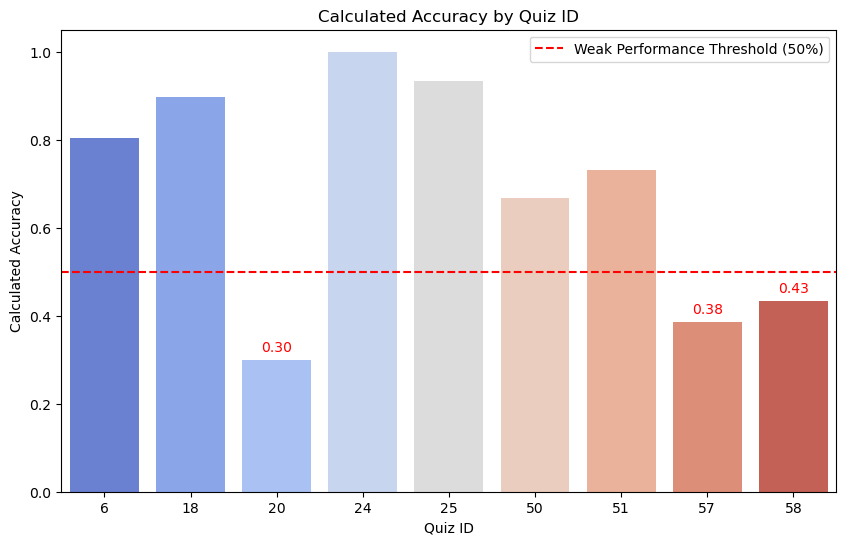

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for calculated accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='quiz_id', y='calculated_accuracy', data=performance_by_quiz, palette='coolwarm')

# Highlight quizzes with accuracy < 50%
for index, row in performance_by_quiz.iterrows():
    if row['calculated_accuracy'] < 0.5:
        plt.text(index, row['calculated_accuracy'] + 0.02, f"{row['calculated_accuracy']:.2f}", color='red', ha='center')

plt.axhline(0.5, color='red', linestyle='--', label='Weak Performance Threshold (50%)')
plt.title("Calculated Accuracy by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Calculated Accuracy")
plt.legend()
plt.show()


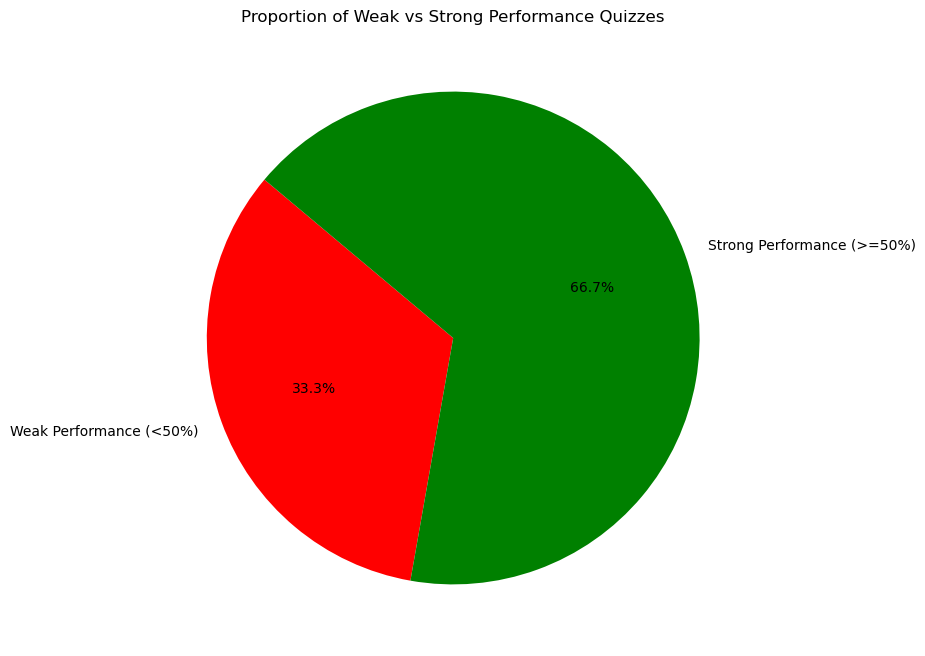

In [16]:
# Data for weak performance
weak_count = len(weak_performance)
strong_count = len(performance_by_quiz) - weak_count

# Pie chart
labels = ['Weak Performance (<50%)', 'Strong Performance (>=50%)']
sizes = [weak_count, strong_count]
colors = ['red', 'green']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Proportion of Weak vs Strong Performance Quizzes")
plt.show()


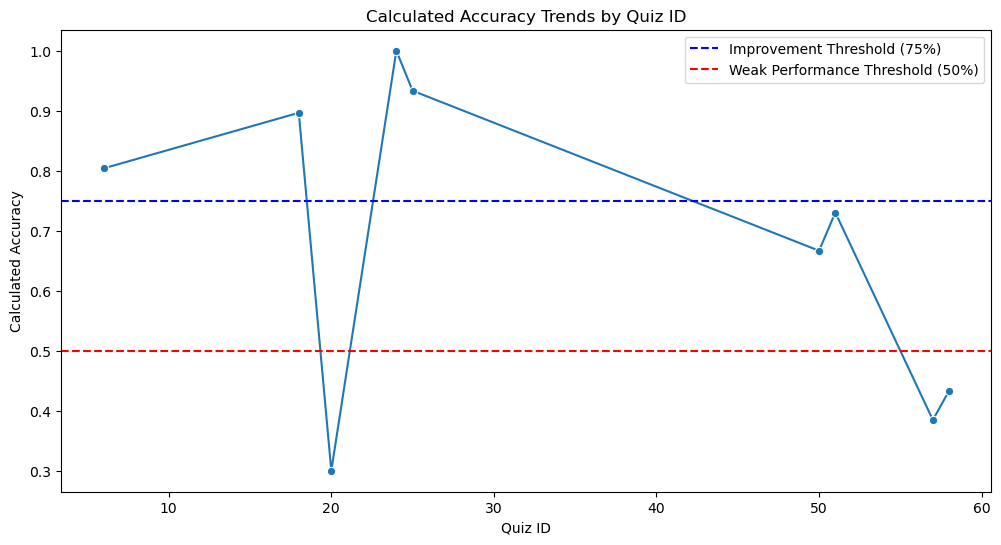

In [17]:
# Line chart for calculated accuracy trends
sorted_performance = performance_by_quiz.sort_values('quiz_id')

plt.figure(figsize=(12, 6))
sns.lineplot(x='quiz_id', y='calculated_accuracy', data=sorted_performance, marker='o')

plt.title("Calculated Accuracy Trends by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Calculated Accuracy")
plt.axhline(0.75, color='blue', linestyle='--', label='Improvement Threshold (75%)')
plt.axhline(0.5, color='red', linestyle='--', label='Weak Performance Threshold (50%)')
plt.legend()
plt.show()


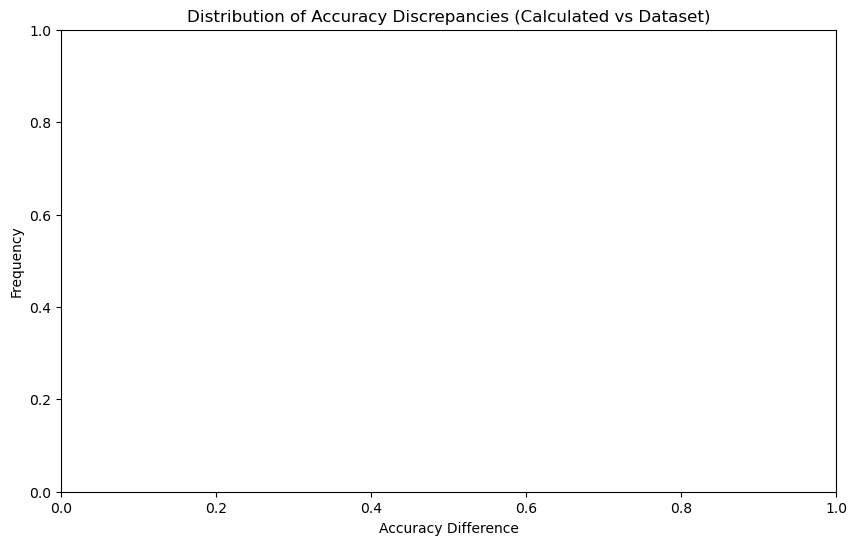

In [18]:
# Histogram for accuracy difference
plt.figure(figsize=(10, 6))
sns.histplot(performance_by_quiz['accuracy_diff'].dropna(), kde=True, bins=10, color='purple')

plt.title("Distribution of Accuracy Discrepancies (Calculated vs Dataset)")
plt.xlabel("Accuracy Difference")
plt.ylabel("Frequency")
plt.show()


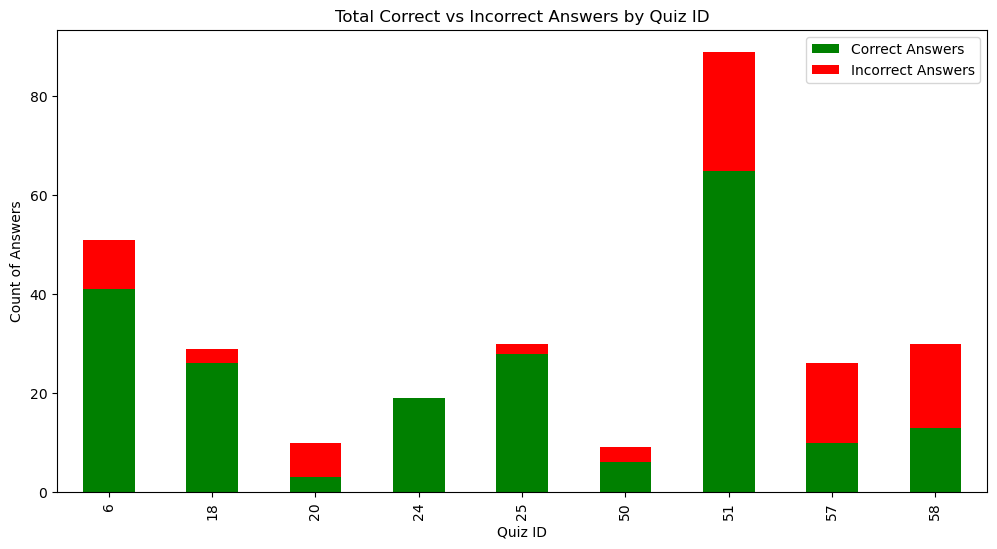

In [19]:
# Stacked bar chart for correct vs incorrect answers
performance_by_quiz.set_index('quiz_id', inplace=True)
performance_by_quiz[['total_correct', 'total_incorrect']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])

plt.title("Total Correct vs Incorrect Answers by Quiz ID")
plt.xlabel("Quiz ID")
plt.ylabel("Count of Answers")
plt.legend(["Correct Answers", "Incorrect Answers"])
plt.show()
performance_by_quiz.reset_index(inplace=True)
